In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from os.path import join

from fixation_extraction import IDT
from smoothing import FIRFilter, IIRFilter, SavGolFilter

DATA_PATH = join('..', 'test_data')

In [2]:
def remove_points(df, x_min, x_max, y_min, y_max):
    df = df[df['norm_pos_x'] <= x_max]
    df = df[df['norm_pos_x'] >= x_min]
    df = df[df['norm_pos_y'] >= y_min]
    df = df[df['norm_pos_y'] <= y_max]
    return df

data = pd.concat([pd.read_excel(join(DATA_PATH, 'itog_gaze_1.xlsx')),
                  pd.read_excel(join(DATA_PATH, 'itog_gaze_2.xlsx'))], axis=0)

data.drop(['world_index', 'confidence', 'base_data'], axis=1, inplace=True)
data = remove_points(data, -1, 1, -1, 1)

In [3]:
x = 'norm_pos_x'
y = 'norm_pos_y'
t = 'gaze_timestamp'

851


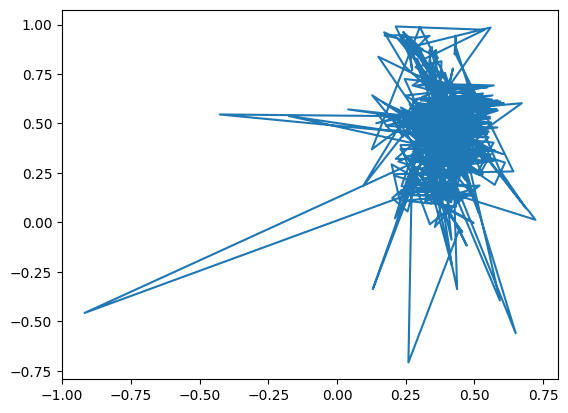

In [8]:
idt = IDT(x=x, y=y, t=t, pk=['Participant', 'tekst'], min_duration=0.01, max_dispersion=0.08,
          distance="euc")
idt_data = idt.transform(data)
print(len(idt_data))
plt.plot(idt_data.norm_pos_x, idt_data.norm_pos_y);

851


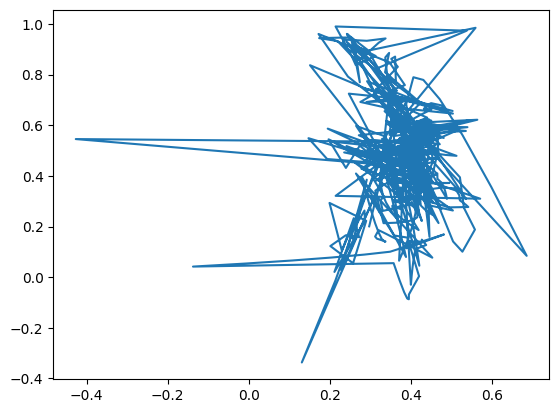

In [9]:
sg = SavGolFilter(x=x, y=y, pk=['Participant', 'tekst'])
sg_data = sg.fit_transform(idt_data)
print(len(sg_data))
plt.plot(sg_data.norm_pos_x, sg_data.norm_pos_y);

851


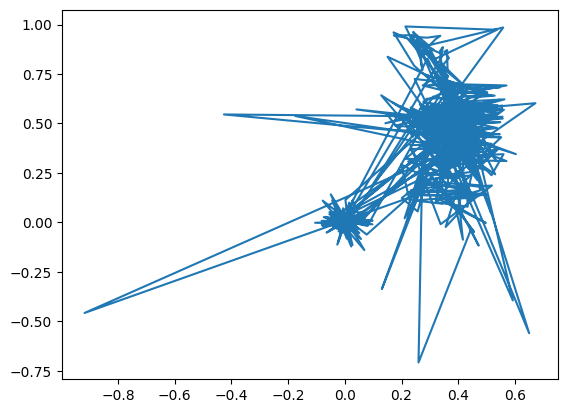

In [10]:
fir = FIRFilter(x=x, y=y, pk=['Participant', 'tekst'], numtaps=21, mode='same')
fir_data = fir.fit_transform(idt_data)
print(len(fir_data))
plt.plot(fir_data.norm_pos_x, fir_data.norm_pos_y);

390


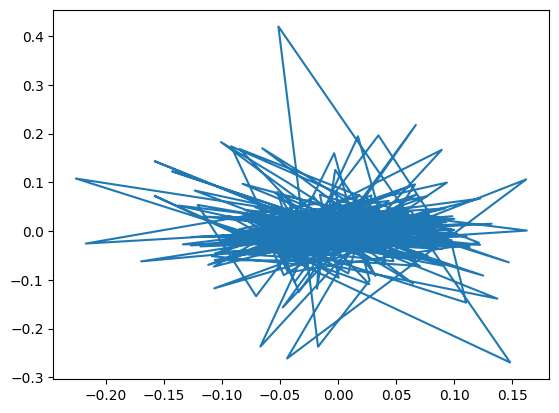

In [11]:
iir = IIRFilter(x=x, y=y, pk=['Participant', 'tekst'])
iir_data = iir.fit_transform(idt_data)
print(len(iir_data))
plt.plot(iir_data.norm_pos_x, iir_data.norm_pos_y);